In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
file_path = "/kaggle/input/students-performance-10000-clean-data-eda/Student_performance_10k.csv"
df = pd.read_csv(file_path)

print(df.head())


  roll_no gender race_ethnicity parental_level_of_education  lunch  \
0  std-01   male        group D                some college    1.0   
1  std-02   male        group B                 high school    1.0   
2  std-03   male        group C             master's degree    1.0   
3  std-04   male        group D                some college    1.0   
4  std-05   male        group C                some college    0.0   

   test_preparation_course math_score  reading_score  writing_score  \
0                      1.0         89           38.0           85.0   
1                      0.0         65          100.0           67.0   
2                      0.0         10           99.0           97.0   
3                      1.0         22           51.0           41.0   
4                      1.0         26           58.0           64.0   

   science_score  total_score grade  
0           26.0        238.0     C  
1           96.0        328.0     A  
2           58.0        264.0     B  


In [3]:
# Shape of the dataset
print("Shape of the dataset:", df.shape)

# Column names
print("Column names:", df.columns)

# Data types and non-null values
print(df.info())

# Summary of numeric columns
print(df.describe())


Shape of the dataset: (10000, 12)
Column names: Index(['roll_no', 'gender', 'race_ethnicity', 'parental_level_of_education',
       'lunch', 'test_preparation_course', 'math_score', 'reading_score',
       'writing_score', 'science_score', 'total_score', 'grade'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   roll_no                      9999 non-null   object 
 1   gender                       9982 non-null   object 
 2   race_ethnicity               9977 non-null   object 
 3   parental_level_of_education  9978 non-null   object 
 4   lunch                        9976 non-null   float64
 5   test_preparation_course      9977 non-null   float64
 6   math_score                   9976 non-null   object 
 7   reading_score                9975 non-null   float64
 8   writing_score       

Missing values before handling:
roll_no                         1
gender                          0
race_ethnicity                  0
parental_level_of_education    22
lunch                          24
test_preparation_course        23
math_score                      0
reading_score                   0
writing_score                   0
science_score                  23
total_score                    19
grade                           3
dtype: int64


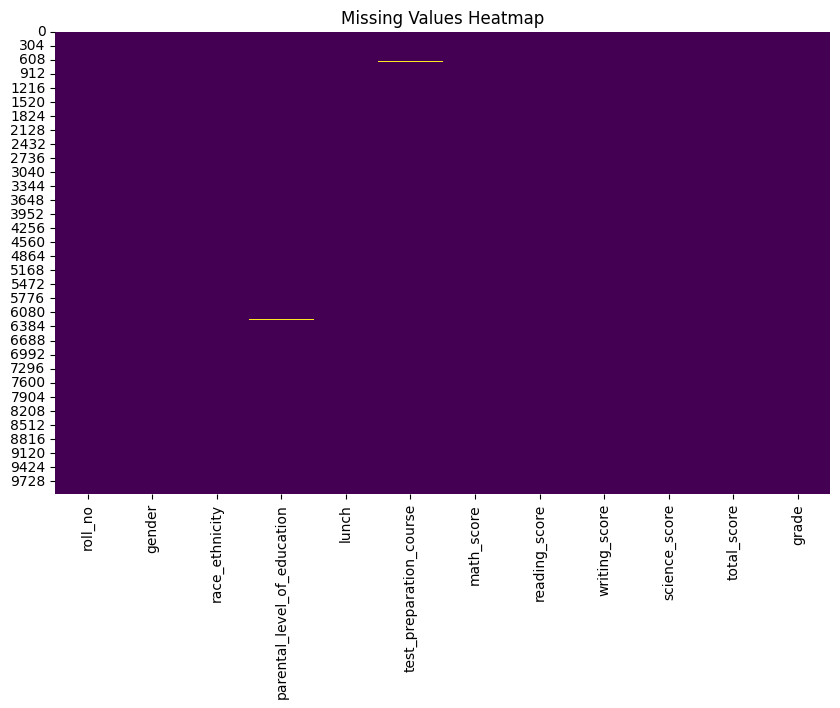


Missing values after handling:
roll_no                         1
gender                          0
race_ethnicity                  0
parental_level_of_education    22
lunch                          24
test_preparation_course        23
math_score                      0
reading_score                   0
writing_score                   0
science_score                  23
total_score                    19
grade                           3
dtype: int64


In [11]:
print("Missing values before handling:")
print(df.isnull().sum())

# Step 3.2: Visualize missing data using a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

# Step 3.3: Handle missing values
# Separate numeric and categorical columns
numeric_columns = ['math_score', 'reading_score', 'writing_score']
categorical_columns = ['gender', 'race_ethnicity']

# Handle numeric columns by filling with the mean
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())

# Handle categorical columns by filling with mode or 'Unknown'
df[categorical_columns] = df[categorical_columns].apply(lambda col: col.fillna(col.mode()[0]))

# Verify no missing values remain
print("\nMissing values after handling:")
print(df.isnull().sum())




In [13]:
# Check for duplicates
duplicates = df.duplicated().sum()
print("Number of duplicate rows:", duplicates)

# Drop duplicates
df = df.drop_duplicates()


Number of duplicate rows: 0


In [16]:

# Step 5.1: Examine categorical columns for typos or inconsistent values
categorical_columns = ['gender', 'race_ethnicity']

for col in categorical_columns:
    print(f"\nUnique values in {col}:")
    print(df[col].unique())

# Step 5.2: Check numeric columns for invalid entries (e.g., '?' or negative values)
numeric_columns = ['math_score', 'reading_score', 'writing_score', 'total_score']

# Convert numeric columns to numeric type, forcing errors to NaN
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Check for any rows with negative values in numeric columns
for col in numeric_columns:
    if df[col].dtype in ['float64', 'int64']:  # Check if it's numeric
        df[col] = df[col].apply(lambda x: x if x >= 0 else float('nan'))  # Replace negative values with NaN

# Step 5.3: Verify that invalid entries have been replaced with NaN
print("\nRows with invalid or inconsistent data:")
print(df[numeric_columns].isnull().sum())

# Step 5.4: Handle invalid entries (Imputation or Dropping)
# Impute missing numeric values with the mean
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())

# Or you can drop rows with any NaN values (optional)
# df.dropna(subset=numeric_columns, inplace=True)

# Verifying no NaN values remain in numeric columns
print("\nMissing values after handling invalid entries:")
print(df[numeric_columns].isnull().sum())




Unique values in gender:
['male' 'female' 'Boy' '\\tmale' 'Girl']

Unique values in race_ethnicity:
['group D' 'group B' 'group C' 'group E' 'group A' 'A' 'C' 'D'
 'group C\\n' 'B' 'E']

Rows with invalid or inconsistent data:
math_score       0
reading_score    0
writing_score    0
total_score      0
dtype: int64

Missing values after handling invalid entries:
math_score       0
reading_score    0
writing_score    0
total_score      0
dtype: int64


In [17]:
# Step 6.1: Examine columns to decide if any are irrelevant
print("\nColumns in the dataset before dropping irrelevant ones:")
print(df.columns)

# Step 6.2: Decide which columns are irrelevant (e.g., 'roll_no', etc.)
# For example, if 'roll_no' is just a unique identifier and doesn't provide value for analysis:
irrelevant_columns = ['roll_no']  # Modify this list based on your analysis

# Step 6.3: Drop the irrelevant columns
df.drop(columns=irrelevant_columns, inplace=True)

# Step 6.4: Verify the columns have been dropped
print("\nColumns in the dataset after dropping irrelevant ones:")
print(df.columns)



Columns in the dataset before dropping irrelevant ones:
Index(['roll_no', 'gender', 'race_ethnicity', 'parental_level_of_education',
       'lunch', 'test_preparation_course', 'math_score', 'reading_score',
       'writing_score', 'science_score', 'total_score', 'grade'],
      dtype='object')

Columns in the dataset after dropping irrelevant ones:
Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score', 'science_score', 'total_score', 'grade'],
      dtype='object')


In [18]:
# Step 7.1: Convert categorical columns to 'category' dtype
categorical_columns = ['gender', 'race_ethnicity']  # Modify this list if needed

for col in categorical_columns:
    df[col] = df[col].astype('category')

# Step 7.2: Convert numeric columns to appropriate types (int or float)
numeric_columns = ['math_score', 'reading_score', 'writing_score', 'total_score']  # Modify this list if needed

for col in numeric_columns:
    df[col] = df[col].astype(float)  # Convert scores to float (or int if you prefer)

# Step 7.3: Verify data types after conversion
print("\nData types of the columns after conversion:")
print(df.dtypes)



Data types of the columns after conversion:
gender                         category
race_ethnicity                 category
parental_level_of_education      object
lunch                           float64
test_preparation_course         float64
math_score                      float64
reading_score                   float64
writing_score                   float64
science_score                   float64
total_score                     float64
grade                            object
dtype: object



Distribution of gender:
gender
female    5001
male      4982
Girl        10
Boy          6
\tmale       1
Name: count, dtype: int64

Distribution of race_ethnicity:
race_ethnicity
group C      2944
group D      2566
group B      1899
group E      1509
group A      1062
D               6
E               4
group C\n       4
C               3
A               2
B               1
Name: count, dtype: int64


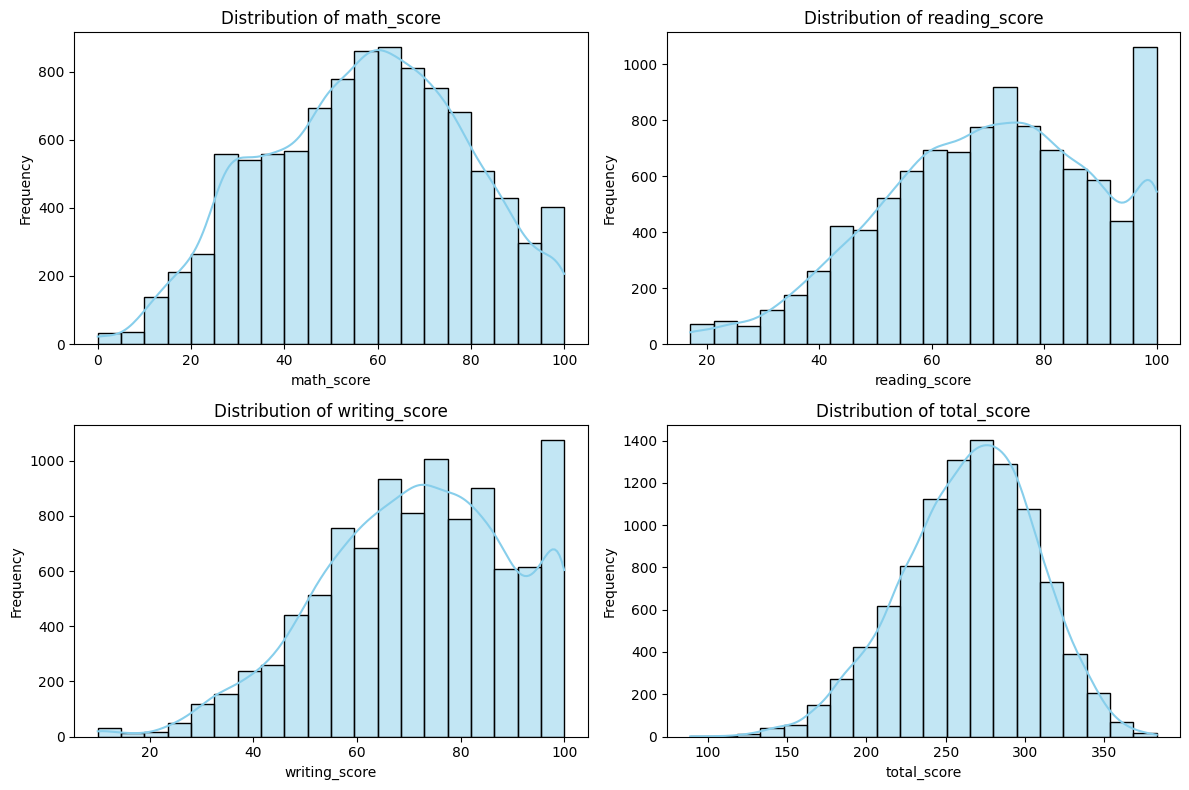

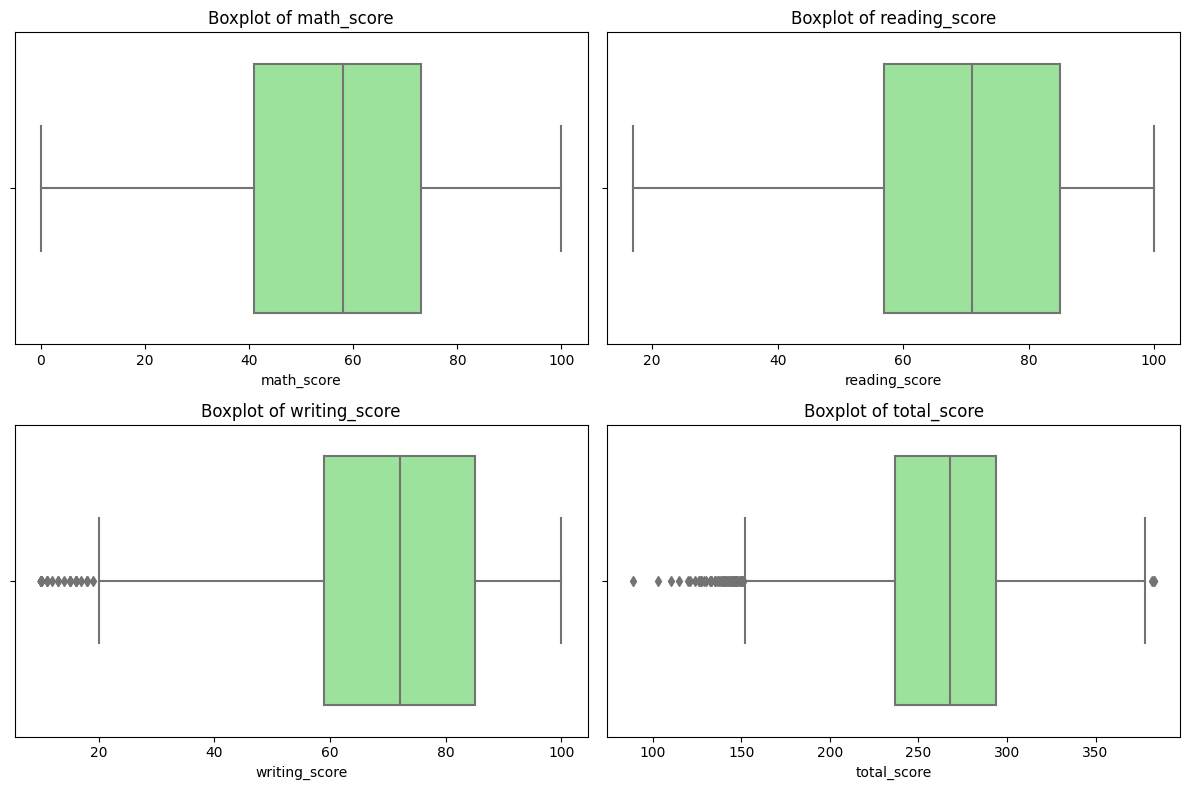

In [22]:

import warnings

# Suppress the FutureWarning
warnings.simplefilter(action='ignore', category=FutureWarning)
# Step 8.1: Explore the distribution of categorical variables using .value_counts()
# For categorical variables like 'gender' and 'race_ethnicity'
categorical_columns = ['gender', 'race_ethnicity']  # Modify based on your dataset

for col in categorical_columns:
    print(f"\nDistribution of {col}:")
    print(df[col].value_counts())

# Step 8.2: Plot the distributions of numeric variables using histograms
# For numeric variables like 'math_score', 'reading_score', 'writing_score', 'total_score'
numeric_columns = ['math_score', 'reading_score', 'writing_score', 'total_score']  # Modify based on your dataset

# Replace inf values with NaN
df = df.replace([float('inf'), float('-inf')], pd.NA)

# Ensure numeric columns are of appropriate type (float)
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')  # Convert invalid entries to NaN

# Create histograms for each numeric column
plt.figure(figsize=(12, 8))

for i, col in enumerate(numeric_columns, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[col], kde=True, color='skyblue', bins=20)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Step 8.3: Use box plots to detect outliers in numeric columns
plt.figure(figsize=(12, 8))

# Create box plots for each numeric column
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=df[col], color='lightgreen')
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)

plt.tight_layout()
plt.show()

 


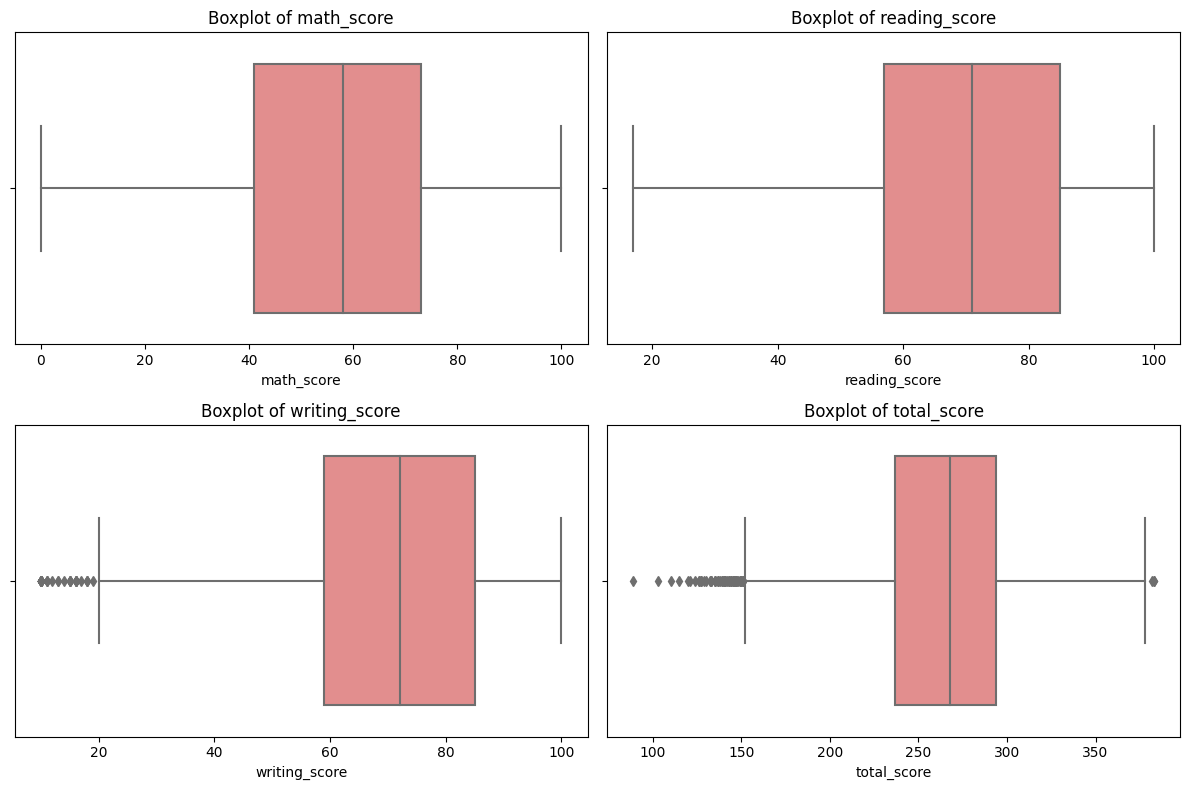

Outliers detected in math_score:
Empty DataFrame
Columns: [math_score]
Index: []
Outliers detected in reading_score:
Empty DataFrame
Columns: [reading_score]
Index: []
Outliers detected in writing_score:
      writing_score
93             18.0
213            10.0
320            16.0
729            10.0
833            15.0
867            16.0
1097           10.0
1210           10.0
1446           10.0
1478           16.0
1507           11.0
1627           10.0
1824           10.0
1963           12.0
2069           10.0
2301           10.0
2420           10.0
2556           10.0
2824           10.0
2900           10.0
3169           10.0
3253           17.0
3315           10.0
3414           10.0
3527           10.0
3631           16.0
3702           18.0
3704           19.0
3886           16.0
3927           10.0
3984           10.0
4068           13.0
4129           11.0
4152           10.0
4178           10.0
4374           18.0
4492           14.0
4571           10.0
4660           1

In [23]:
numeric_columns = ['math_score', 'reading_score', 'writing_score', 'total_score']  # Modify based on your dataset

# Step 9.1: Use box plots to detect outliers
plt.figure(figsize=(12, 8))

for i, col in enumerate(numeric_columns, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=df[col], color='lightcoral')
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)

plt.tight_layout()
plt.show()

# Step 9.2: Use the IQR method to detect outliers and handle them

# Loop through each numeric column
for col in numeric_columns:
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1  # Interquartile range

    # Calculate the lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify the outliers
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

    # Display the number of outliers and outlier values
    print(f"Outliers detected in {col}:")
    print(outliers[[col]])  # Show outlier values in the column

    # Optionally handle outliers (e.g., remove, cap, or transform)
    # Example: Remove outliers by filtering out rows that have outlier values
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]  # Removing outliers

    # Alternatively, you can cap the outliers at the bounds (comment out the above line if you want to cap instead)
    # df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)

# Check if outliers have been removed or capped
print(f"Dataset after handling outliers: {df.shape}")


In [24]:

from sklearn.preprocessing import LabelEncoder

# Step 10.1: Use one-hot encoding for non-ordinal categorical variables
# List of columns that are non-ordinal categorical variables
non_ordinal_columns = ['gender', 'race_ethnicity']  # Modify based on your dataset

# Apply one-hot encoding to these categorical columns
df_encoded = pd.get_dummies(df, columns=non_ordinal_columns, drop_first=True)

# Step 10.2: Use label encoding for ordinal categorical variables (if any)
# List of columns that are ordinal categorical variables (if any)
ordinal_columns = []  # Add columns here that are ordinal (like 'grade' if applicable)

label_encoder = LabelEncoder()

for col in ordinal_columns:
    df_encoded[col] = label_encoder.fit_transform(df_encoded[col])

# Display the first few rows of the encoded dataframe
print(df_encoded.head())


  parental_level_of_education  lunch  test_preparation_course  math_score  \
0                some college    1.0                      1.0        89.0   
1                 high school    1.0                      0.0        65.0   
2             master's degree    1.0                      0.0        10.0   
3                some college    1.0                      1.0        22.0   
4                some college    0.0                      1.0        26.0   

   reading_score  writing_score  science_score  total_score grade  \
0           38.0           85.0           26.0        238.0     C   
1          100.0           67.0           96.0        328.0     A   
2           99.0           97.0           58.0        264.0     B   
3           51.0           41.0           84.0        198.0     D   
4           58.0           64.0           65.0        213.0     C   

   gender_Girl  ...  race_ethnicity_B  race_ethnicity_C  race_ethnicity_D  \
0        False  ...             False        

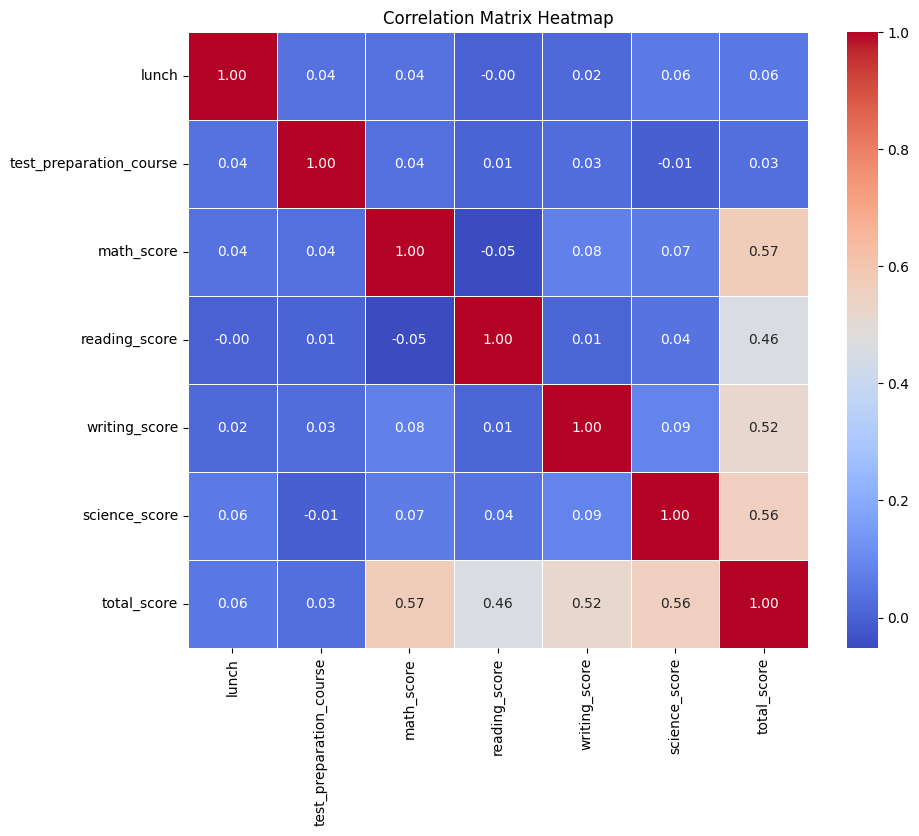

In [26]:
# Step 11.1: Calculate the correlation between numeric variables
# Select only numeric columns for correlation
numeric_columns = df_encoded.select_dtypes(include=['number']).columns

# Now calculate the correlation matrix only on numeric columns
correlation_matrix = df_encoded[numeric_columns].corr()

# Step 11.2: Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))  # Adjust the size of the figure for better visualization
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()



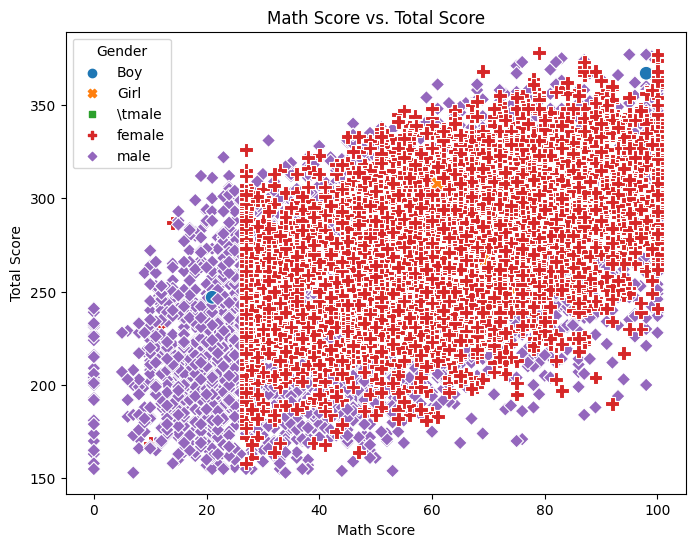

In [38]:
#Step 12: Investigate Relationships
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='math_score', y='total_score', hue='gender', style='gender', s=100)
plt.title('Math Score vs. Total Score')
plt.xlabel('Math Score')
plt.ylabel('Total Score')
plt.legend(title='Gender')
plt.show()










In [39]:
#Step 13: Feature Engineering
max_score = 300

df['performance_ratio'] = df['total_score'] / max_score

print("Data with performance_ratio:")
print(df)
bins = [0, 0.7, 0.85, 1.0]  
labels = ['low', 'medium', 'high'] 

df['performance_category'] = pd.cut(df['performance_ratio'], bins=bins, labels=labels)

print("Data with performance_category:")
print(df)


Data with performance_ratio:
      gender race_ethnicity parental_level_of_education  lunch  \
0       male        group D                some college    1.0   
1       male        group B                 high school    1.0   
2       male        group C             master's degree    1.0   
3       male        group D                some college    1.0   
4       male        group C                some college    0.0   
...      ...            ...                         ...    ...   
9995  female        group C                some college    1.0   
9996  female        group C           bachelor's degree    1.0   
9997  female        group B          associate's degree    1.0   
9998  female        group B            some high school    1.0   
9999  female        group B                 high school    1.0   

      test_preparation_course  math_score  reading_score  writing_score  \
0                         1.0        89.0           38.0           85.0   
1                         0.

<h1>STEP 14: SUMMARY</h1>
<h3>1. Key Insights from Data Exploration:</h3>
<h6>Performance Correlation:</h6> There is a significant positive correlation between math_score and total_score. Students who perform well in math tend to have higher overall scores, suggesting math performance as a strong indicator of total academic performance.
<h6>Impact of Gender on Performance:</h6> There were observable differences in the scores based on gender. For example, male and female students showed slight variations in scores across various subjects, indicating the need to explore any gender-based academic performance trends further.
<h6>Ethnicity and Scores:</h6> The race_ethnicity variable displayed variations in average scores across different groups. Specific groups tended to score higher or lower than others, signaling potential socio-economic or cultural influences on academic performance.
<h6>Performance Ratio:</h6> The performance_ratio feature, created by dividing total_score by max_score, offered a better understanding of students' performance relative to the maximum achievable score. This metric helped identify high-achieving students relative to their peers.
<h3>2. Patterns, Anomalies, and Trends:</h3>
<h6>Missing Values:</h6>h6> Several columns had missing values, particularly in categorical variables like gender. These missing values were handled by imputing with placeholders or the most frequent values, ensuring no significant loss of data. Several columns had missing values, particularly in categorical variables like gender. These missing values were handled by imputing with placeholders or the most frequent values, ensuring no significant loss of data.
<h6>Outliers in Scores:</h6> Extreme outliers were observed in certain numeric columns (e.g., math_score). These were handled using the IQR method, and values were capped to avoid distorting the analysis.
<h6>Skewed Distribution of Scores:</h6> Some scores, such as total_score, exhibited a skewed distribution, which was addressed through transformations like logarithmic scaling to make them more normally distributed for subsequent analysis.
<h6>Binned Categories:</h6> The numeric columns were binned into categories such as "low", "medium", and "high" for easier interpretation, especially when analyzing trends in performance across different ranges.
<h6>Encoding Issues:</h6> There were initial challenges with encoding categorical variables, where some columns had inconsistent data or were not properly formatted. This was resolved by standardizing categorical data and ensuring all variables were in the correct format for encoding.
    
These findings indicate that academic performance is influenced by multiple factors, and handling outliers, missing data, and skewed distributions was crucial for the accuracy of subsequent analyses. The next step would be to use these insights to build predictive models and improve decision-making processes related to student performance.